In [1]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import tensorflow as tf
tf.test.gpu_device_name()

Mounted at /content/drive


'/device:GPU:0'

In [2]:
#import packages

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline
import re
import sys
import warnings
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import joblib

In [3]:
#needed for DNN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.regularizers import l2,l1
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from sklearn import preprocessing
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/dataset/bangla_comments_tokenized.csv', encoding='utf-8')
df.tail()


,label,text,clean_text,tokenized_clean_text,tokenized_stem_text
43996,not bully,হিরো আলম এগা যাও,হিরো আলম এগিয়ে যাও,"['হিরো', 'আলম', 'এগিয়ে', 'যাও']","['হিরো', 'আলম', 'এগা', 'যাও']"
43997,not bully,হিরো আলম সাপোর্ট অসংখ্য ধন্যবাদ আপনা,হিরো আলমকে সাপোর্ট অসংখ্য ধন্যবাদ আপনাকে,"['হিরো', 'আলমকে', 'সাপোর্ট', 'অসংখ্য', 'ধন্যবা...","['হিরো', 'আলম', 'সাপোর্ট', 'অসংখ্য', 'ধন্যবাদ'..."
43998,not bully,হিরো ভাই এগা য়াও,হিরো ভাই এগিয়ে য়াও,"['হিরো', 'ভাই', 'এগিয়ে', 'য়াও']","['হিরো', 'ভাই', 'এগা', 'য়াও']"
43999,not bully,হুম ভাও তোমরা এগা যাও তোমা পিছনে আছি,হুম ভাও তোমরা এগিয়ে যাও তোমাদের পিছনে আছি,"['হুম', 'ভাও', 'তোমরা', 'এগিয়ে', 'যাও', 'তোমাদ...","['হুম', 'ভাও', 'তোমরা', 'এগা', 'যাও', 'তোমা', ..."
44000,not bully,হ্যালো তোমা সাথে আমা চ্যাট করবে,হ্যালো তোমাদের সাথে আমা চ্যাট করবে,"['হ্যালো', 'তোমাদের', 'সাথে', 'আমা', 'চ্যাট', ...","['হ্যালো', 'তোমা', 'সাথে', 'আমা', 'চ্যাট', 'কর..."


In [5]:
df['label'] = df['label'].replace({'not bully':'acceptable'})

In [6]:
# label encoding for output

sample_data = [2000,5000,10000,20000,30000,40000]

def label_encoding(category,bool):
  le = preprocessing.LabelEncoder()
  le.fit(category)
  encoded_labels = le.transform(category)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print("\n\t\t\t Label Encoding ","\nClass Names:-->",le.classes_)
    for i in sample_data:
      print(category[i],' ', encoded_labels[i],'\n')
    return labels

labels = label_encoding(df.label,True)


			 Label Encoding  
Class Names:--> ['acceptable' 'religious' 'sexual' 'threat' 'troll']
acceptable   0 

troll   4 

acceptable   0 

sexual   2 

sexual   2 

acceptable   0 



In [7]:
#split the data in train, validation, test

def dataset_split(headlines,category):

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.7,
                                                  test_size = 0.3,random_state =0)
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [8]:
df.text=df.text.astype(str)

X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(df.text,labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 44001 
	Training		 24640 
	Test			 8801 
	Validation		 10560


In [9]:
#define perameters for GRU and padding and tokenization
vocab_size =50000
embedding_dim = 64
max_length = 20
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [10]:
# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train.values)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train.values)
train_padded = pad_sequences(train_sequences,padding=padding_type, maxlen=max_length)

In [11]:
#Tokenizer Info
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
#insightful info about tokens
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)

#Print all the information
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

Words --> Counts:
না 	 8930
নাস্তিক 	 4145
কর 	 3082
বিশ্বাস 	 2953
আল্লাহ 	 2891
যে 	 2752
কথা 	 2552
এক 	 2486
তুই 	 2381
ও 	 2120

Words --> Documents:
না 	 5572
নাস্তিক 	 3345
কর 	 2489
যে 	 2116
এক 	 2093
আল্লাহ 	 2045
কথা 	 1963
বিশ্বাস 	 1870
ও 	 1695
তুই 	 1625

Words --> Index:
দায়ভ 	 33205
দিয়েছেএবং 	 33204
পদক্ষেপের 	 33203
ছেরী 	 33202
খ্রৃস্টান 	 33201
পপুলারটি 	 33200
ম্যে 	 33199
ব্যেবি 	 33198
ফিরাতে 	 33197
উইয়ার্ড 	 33196

Total Documents --> 24640
Found 33205 unique tokens


In [12]:
def padded_headlines(original,encoded,padded):
  print("\n\t\t\t Encoded Sequences ","\n")  
  print(original,"\n",encoded) 
  print("\n\t\t\t Paded Sequences \n",original,"\n",padded)

padded_headlines(X_train[1],train_sequences[1],train_padded[1])


			 Encoded Sequences  

ঘরে শুট কেমন ক্যামেরা ছিল 
 [12, 13832, 281, 8, 147, 797, 41, 12, 79, 309, 133, 2251, 145, 5, 24, 5, 2, 112, 79, 2, 14, 18, 369, 840, 5, 2, 79, 2, 143, 693, 52, 5, 220, 7, 6, 3943, 5, 2, 255, 30, 11, 33, 43, 255, 365, 7523, 185, 2632, 14, 18, 2156, 577, 14, 18, 2066, 993, 13, 444, 13833, 472, 7524, 9537, 4331, 13834, 113, 4, 67, 3640, 472, 7524, 68, 9537, 4331, 67, 13835]

			 Paded Sequences 
 ঘরে শুট কেমন ক্যামেরা ছিল 
 [  993    13   444 13833   472  7524  9537  4331 13834   113     4    67
  3640   472  7524    68  9537  4331    67 13835]


In [13]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid.values)
validation_padded = pad_sequences(validation_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_valid[12222],validation_sequences[1],validation_padded[1])


In [14]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test.values)
test_padded = pad_sequences(test_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_test[10],test_sequences[1],test_padded[1])


In [15]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

In [16]:
accuracy_threshold = 0.97
vocab_size = 50000
embedding_dim=128
max_length = 20
num_category = 5
opt=Adam(lr=0.001)
path="/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/"

In [17]:
keras.backend.clear_session()
#callback function for early stopping
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()

**Bidirectional GRU**

In [18]:
# Saved the Best Model
filepath = path+"BidGruModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 


BGRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(GRU(64,return_sequences=True,dropout=0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])


#BGRU_model = tf.keras.Sequential([
#    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#    tf.keras.layers.Bidirectional(GRU(64,dropout=0.2)),
#    tf.keras.layers.Dense(50, activation='relu'),
#    tf.keras.layers.Dense(50, activation='relu'),
#    tf.keras.layers.Dense(20, activation='relu'),
#    #tf.keras.layers.Dense(50, activation='relu'),
#    #tf.keras.layers.Dense(10,kernel_regularizer='l2',bias_regularizer='l2', activation='relu'),
    
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dropout(0.1),
#    tf.keras.layers.Dense(num_category, activation='softmax')
#])


In [19]:
BGRU_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
BGRU_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 128)           6400000   
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 128)           74496     
_________________________________________________________________
dense (Dense)                (None, 20, 64)            8256      
_________________________________________________________________
dropout (Dropout)            (None, 20, 64)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 20, 64)            4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0

In [20]:
num_epochs = 10
batch = 50

BGRU_model_history = BGRU_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/10
493/493 [==============================] - 39s 70ms/step - loss: 0.9142 - accuracy: 0.6442 - val_loss: 0.6344 - val_accuracy: 0.7758

Epoch 00001: val_accuracy improved from -inf to 0.77576, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/BidGruModel.h5
Epoch 2/10
493/493 [==============================] - 33s 68ms/step - loss: 0.4653 - accuracy: 0.8468 - val_loss: 0.6570 - val_accuracy: 0.7791

Epoch 00002: val_accuracy improved from 0.77576 to 0.77907, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/BidGruModel.h5
Epoch 3/10
493/493 [==============================] - 33s 67ms/step - loss: 0.2634 - accuracy: 0.9175 - val_loss: 0.7974 - val_accuracy: 0.7643

Epoch 00003: val_accuracy did not improve from 0.77907
Epoch 4/10
493/493 [==============================] - 32s 66ms/step - loss: 0.1619 - accuracy: 0.9497 - val_loss: 0.9172 - val_accuracy: 0.7603

Epoch 00004: val_acc

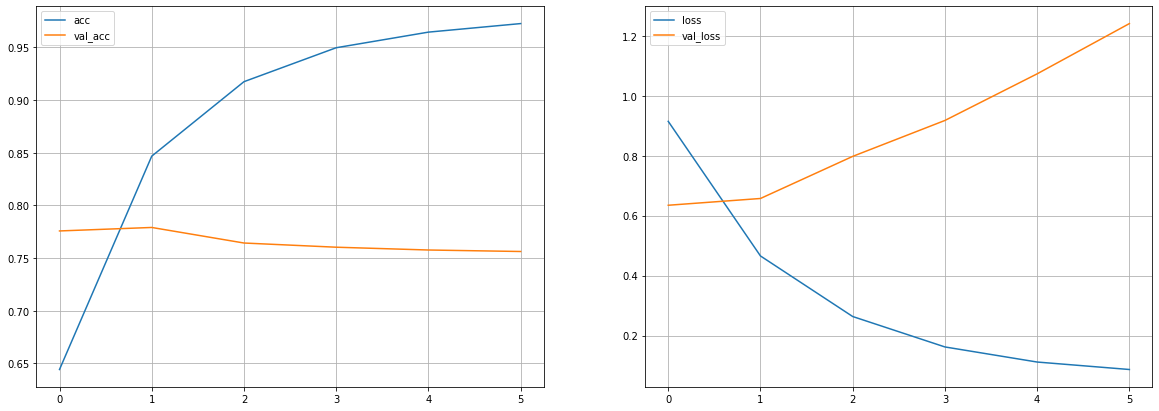

In [21]:
# Plot training results
def model_evaluate(history,directory,filename):
  H = history.history
  fig = plt.figure(figsize = (20, 7))
  plt.subplot(121)
  plt.plot(H['accuracy'], label = 'acc')
  plt.plot(H['val_accuracy'], label = 'val_acc')
  plt.grid()
  plt.legend()
  plt.subplot(122)
  plt.plot(H['loss'], label = 'loss')
  plt.plot(H['val_loss'], label = 'val_loss')
  plt.grid()
  plt.legend()
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")

model_evaluate(BGRU_model_history,"BiGru","Bi_Gru_evaluation")

In [22]:
#confusion matrix
def conf_matrix(y_pred,classfier,directory,filename):

  cm = confusion_matrix(y_test, y_pred) 
# Transform to df for easier plotting
  
  cm_df = pd.DataFrame(cm,
                       index = ['acceptable' ,'religious' ,'sexual', 'threat', 'troll'], 
                       columns = ['acceptable' ,'religious' ,'sexual', 'threat', 'troll'])
  plt.figure(figsize=(8,6))
  sn.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
  plt.title('\n'+classfier+'Accuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.xticks(rotation = 45)
  plt.yticks(rotation = 45)
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  plt.show()
  plt.close()

In [23]:
#Report generation

def report_generate(pred,classfier,directory,filename):
  report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = pred, output_dict=True)).transpose()
  report = report.rename(index={'0': 'acceptable','1':'religious','2':'sexual','3':'threat','4':'troll'})
  report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
  report=report.drop(["support"],axis=1)
  columns = ['precision','recall','f1-score']
  report.columns = columns
  plt = report.plot(kind='bar',figsize=(12,6))
  
  plot=plt.tick_params(rotation=40)
  plt.figure.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  
  return plot,report

In [24]:
#make predictions

model = load_model(path+"BidGruModel.h5")
predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)


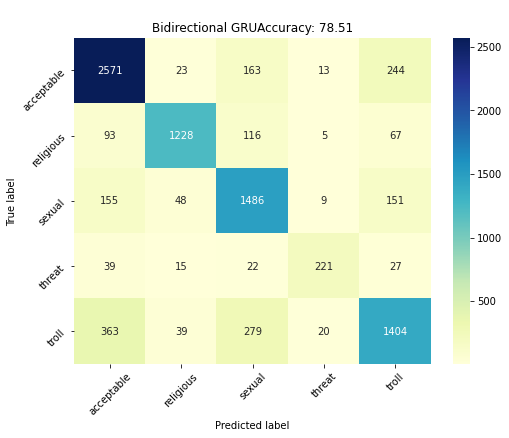

In [25]:
conf_matrix(y_pred,"Bidirectional GRU","BiGru","Bi_Gru_confusion_matrix")

,precision,recall,f1-score
acceptable,79.82,85.30,82.47
religious,90.76,81.38,85.81
sexual,71.93,80.37,75.91
threat,82.46,68.21,74.66
troll,74.17,66.70,70.24
accuracy,78.51,78.51,78.51
macro avg,79.83,76.39,77.82
weighted avg,78.78,78.51,78.45


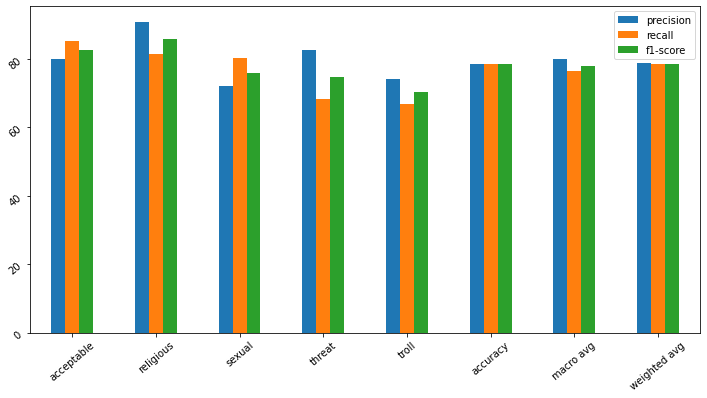

In [26]:
GRUreport=report_generate(y_pred,"Bidirectional GRU","BiGru","Bi_Gru_report")
GRUreport[1]

**LSTM**

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
filepath = path+"LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 


LSTM_model = Sequential()
LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
LSTM_model.add(SpatialDropout1D(0.7))
LSTM_model.add(LSTM(128, dropout=0.7,return_sequences=True, recurrent_dropout=0.7))
LSTM_model.add(LSTM(128, dropout=0.7, recurrent_dropout=0.7))
LSTM_model.add(Dense(num_category, activation='softmax'))

LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(LSTM_model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 128)           6400000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 20, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 20, 128)           131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 6,663,813
Trainable params: 6,663,813
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
num_epochs = 50
batch = 256

LSTM_history = LSTM_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)


Epoch 1/50
97/97 [==============================] - 47s 244ms/step - loss: 1.4459 - accuracy: 0.3648 - val_loss: 1.0804 - val_accuracy: 0.5308

Epoch 00001: val_accuracy improved from -inf to 0.53078, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/LSTM.h5
Epoch 2/50
97/97 [==============================] - 22s 229ms/step - loss: 1.1072 - accuracy: 0.5259 - val_loss: 0.9241 - val_accuracy: 0.6282

Epoch 00002: val_accuracy improved from 0.53078 to 0.62822, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/LSTM.h5
Epoch 3/50
97/97 [==============================] - 22s 229ms/step - loss: 0.9691 - accuracy: 0.6129 - val_loss: 0.8131 - val_accuracy: 0.6957

Epoch 00003: val_accuracy improved from 0.62822 to 0.69574, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/LSTM.h5
Epoch 4/50
97/97 [==============================] - 22s 231ms/step - l

In [29]:
#make predictions

LSTM_model = load_model(path+"LSTM.h5")
predictions = LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

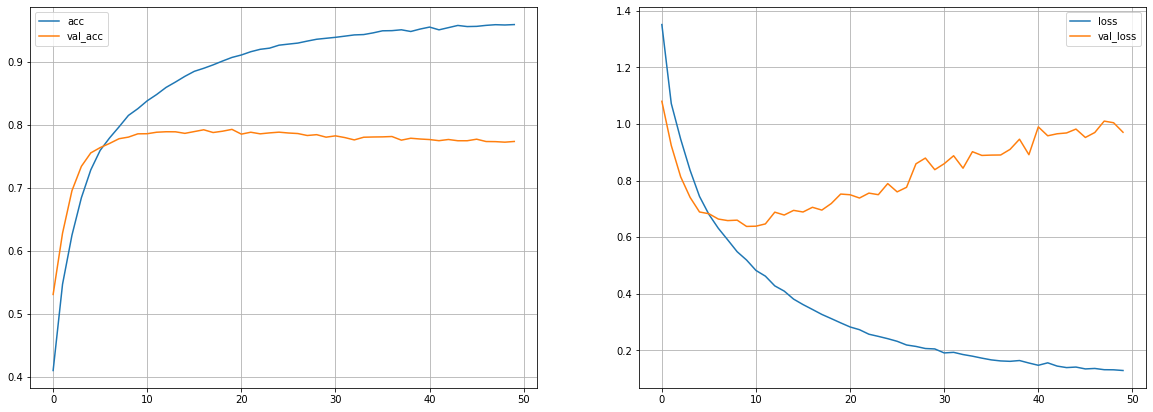

In [30]:
# Plot training results
model_evaluate(LSTM_history,"LSTM","LSTM_evaluation")


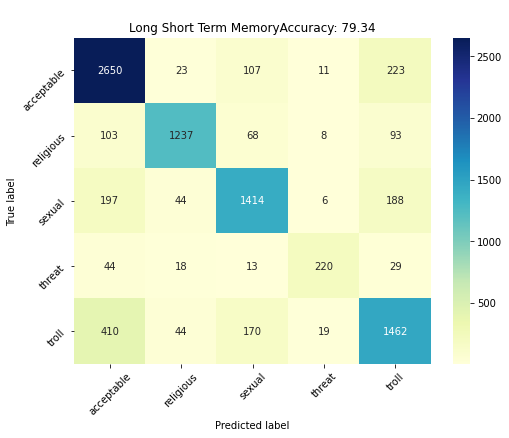

In [31]:
conf_matrix(y_pred,"Long Short Term Memory","LSTM","LSTM_confusion_matrix")

,precision,recall,f1-score
acceptable,77.85,87.92,82.58
religious,90.56,81.97,86.05
sexual,79.80,76.47,78.10
threat,83.33,67.90,74.83
troll,73.28,69.45,71.32
accuracy,79.34,79.34,79.34
macro avg,80.96,76.75,78.58
weighted avg,79.55,79.34,79.26


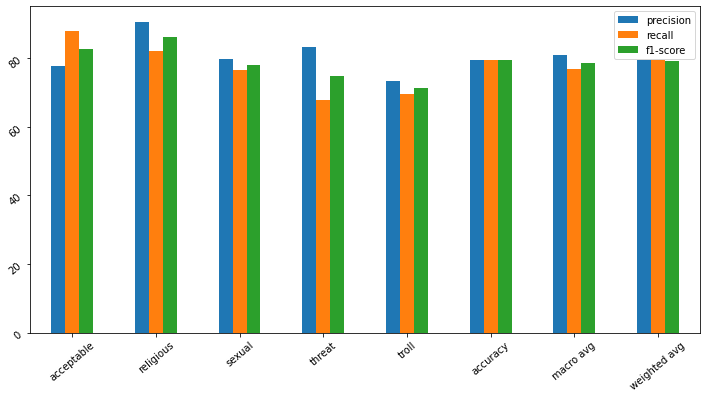

In [32]:
LSTMreport=report_generate(y_pred,"Long Short Term Memory","LSTM","LSTM_report")
LSTMreport[1]

In [33]:
#testing out
txt = ["এজন্য ভারত বাংলাদেশে এসে হোয়াইট ওয়াস হয়েগেছে মনে নেই"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = LSTM_model.predict(padded)

labels = ['acceptable', 'religious', 'sexual', 'threat', 'troll']
print(pred, labels[np.argmax(pred)])

[[0.44652545 0.00351322 0.00973129 0.00936885 0.5308612 ]] troll


**C-LSTM**

In [54]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

filepath = path+"C-LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 
embedding_dim=128
# create the model
C_LSTM_model = Sequential()
C_LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
C_LSTM_model.add(SpatialDropout1D(0.7))
C_LSTM_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
C_LSTM_model.add(MaxPooling1D(pool_size=2))
C_LSTM_model.add(LSTM(128, dropout=0.7, recurrent_dropout=0.7))
C_LSTM_model.add(Dense(5, activation='softmax'))

C_LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(C_LSTM_model.summary())


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 128)           6400000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 20, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 20, 32)            12320     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 645       
Total params: 6,495,397
Trainable params: 6,495,397
Non-trainable params: 0
____________________________________________

In [55]:
num_epochs = 10
batch = 128

C_LSTM_history = C_LSTM_model.fit(train_padded, train_label_seq,
                           epochs=num_epochs,
                           batch_size = batch,
                           validation_data=(validation_padded,valid_label_seq),
                           verbose=1,
                           callbacks = callback_list)


Epoch 1/10
193/193 [==============================] - 25s 111ms/step - loss: 1.4076 - accuracy: 0.3776 - val_loss: 0.9958 - val_accuracy: 0.5936

Epoch 00001: val_accuracy improved from -inf to 0.59356, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 2/10
193/193 [==============================] - 21s 108ms/step - loss: 0.9700 - accuracy: 0.6144 - val_loss: 0.8491 - val_accuracy: 0.6826

Epoch 00002: val_accuracy improved from 0.59356 to 0.68258, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 3/10
193/193 [==============================] - 21s 108ms/step - loss: 0.8244 - accuracy: 0.6952 - val_loss: 0.7990 - val_accuracy: 0.7135

Epoch 00003: val_accuracy improved from 0.68258 to 0.71354, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 4/10
193/193 [==============================] - 21s 

In [56]:
#make predictions

C_LSTM_model = load_model(path+"C-LSTM.h5")
predictions = C_LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

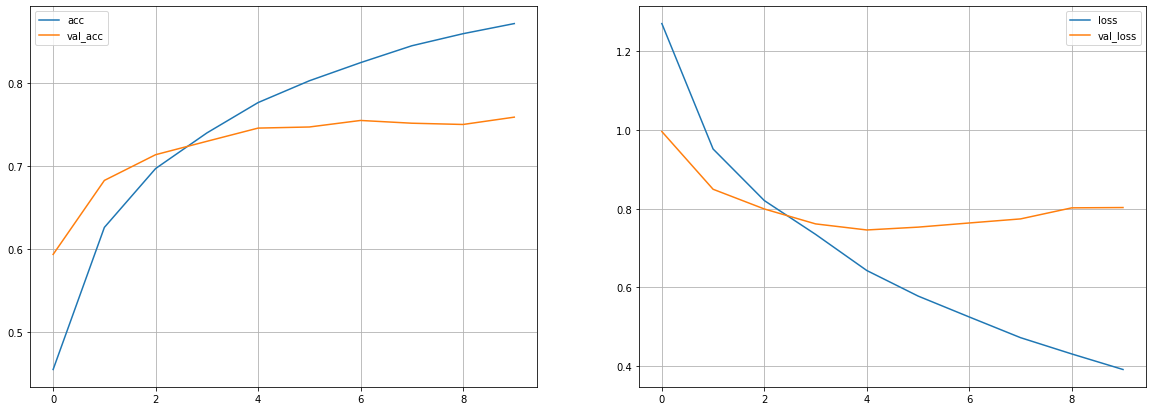

In [57]:
# Plot training results
model_evaluate(C_LSTM_history,"C_LSTM","C_LSTM_evaluation")


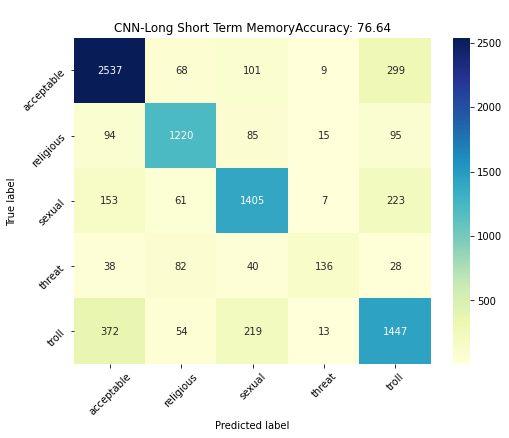

In [58]:
conf_matrix(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_confusion_matrix")

,precision,recall,f1-score
acceptable,79.43,84.17,81.73
religious,82.15,80.85,81.50
sexual,75.95,75.99,75.97
threat,75.56,41.98,53.97
troll,69.17,68.74,68.95
accuracy,76.64,76.64,76.64
macro avg,76.45,70.35,72.42
weighted avg,76.57,76.64,76.40


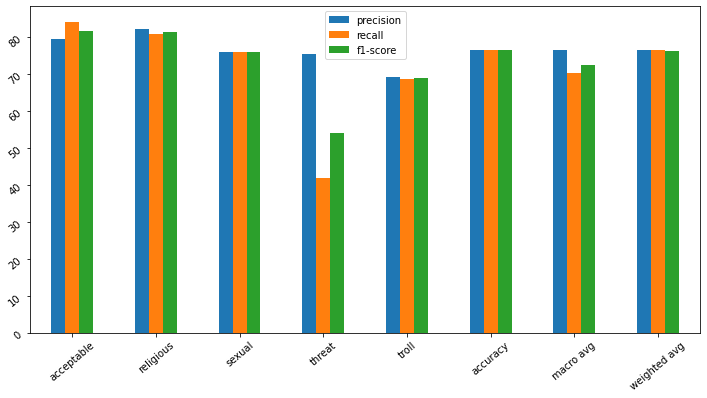

In [60]:
C_LSTMreport=report_generate(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_report")
C_LSTMreport[1]